In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from prophet import Prophet
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

import pandas as pd
import numpy as np

import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)
import sys  
sys.path.insert(0, '../../')
import RadonDF_Handler

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [27]:
# p-value <= 0.05 means data is stationary
def adfullerTest():
    for column in columns:
        result = adfuller(column)
        print('ADF Statistic: %f' % result[0])
        print('p-value: %f' % result[1])
        print('Critical Values:')
        for key, value in result[4].items():
            print('\t%s: %.3f' % (key, value))

        print("-----------------------------------")

In [28]:
D001_df = pd.read_csv('./../../../../../Data/SensorsData/interpolated_D001_data.csv')
D001_df = D001_df.iloc[913:]
D001_df
D001_df['time'] =  pd.to_datetime(D001_df['time'], format='%Y-%m-%d %H:%M:%S')
D001_df.index = D001_df['time']
D001_df = D001_df.drop(['time'],axis = 1)

In [29]:
columns = [np.log(D001_df['T'].values),np.log(D001_df['H'].values),np.log(D001_df['P'].values),np.log(D001_df['CO2'].values)]


In [32]:
D001_df

,T,Rn,H,P,CO2
time,,,,,
2019-07-05 15:00:00,33.304737,10.995556,32.315789,101.571263,29.263158
2019-07-05 16:00:00,33.566316,10.340526,33.157895,101.553895,28.894737
2019-07-05 17:00:00,33.453500,9.654000,32.050000,101.534200,28.150000
2019-07-05 18:00:00,33.578947,10.009474,32.526316,101.527526,28.789474
2019-07-05 19:00:00,33.745789,13.413684,32.947368,101.523500,29.684211
...,...,...,...,...,...
2021-08-18 08:00:00,22.772000,145.034000,60.800000,101.978200,138.800000
2021-08-18 09:00:00,22.665000,226.328000,61.500000,101.960600,137.400000
2021-08-18 10:00:00,22.703750,247.572500,60.875000,101.922750,136.375000


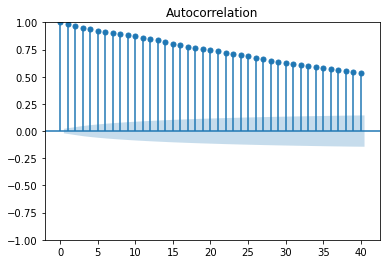

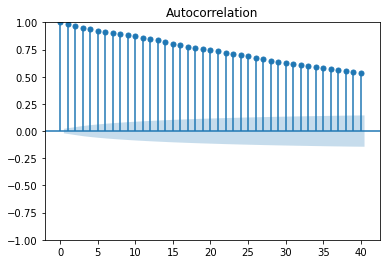

In [42]:
plot_acf(D001_df['P'])

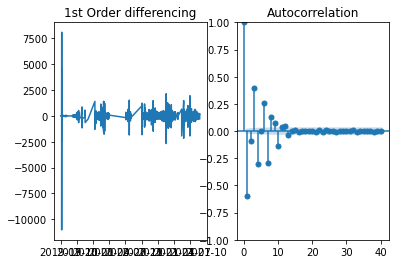

In [24]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('1st Order differencing')
ax1.plot(D001_df.Rn.diff().diff().diff().diff())

ax2 = f.add_subplot(122)
plot_acf(D001_df.Rn.diff().diff().diff().diff().dropna(), ax=ax2)
plt.show()


In [5]:
X = D001_df['Rn'].values
X = np.log(X)
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

C:\Users\valdo\AppData\Local\Temp\ipykernel_19992\3885393077.py:2: RuntimeWarning: divide by zero encountered in log
  X = np.log(X)


MissingDataError: exog contains inf or nans